In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import random

# Data Preparation

In [2]:
def preprocess_images_from_folder(folder_path):
    data = []
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        pet_img = cv.imread(img_path, 0)
        pet_img = cv.resize(pet_img, (65, 65))
        image = np.array(pet_img).flatten()/ 255.0
        label = int("dog" in img)
        data.append((image, label))
    return data

In [3]:
def save_pickle(file_path, data):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)

In [4]:
train_folder = 'train'
test_folder = 'test1'

In [5]:
train_data = preprocess_images_from_folder(train_folder)
test_data = preprocess_images_from_folder(test_folder)

In [6]:
save_pickle('train_data.pickle', train_data)
save_pickle('test_data.pickle', test_data)

In [7]:
def feature_label(data):
    random.shuffle(data)
    features, labels = zip(*data)
    return features, labels

# Model Training

In [8]:
x, y = feature_label(train_data)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
model = SVC(C=1 , kernel = 'rbf', gamma = 'auto')

In [11]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [12]:
cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')

In [13]:
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.5952     0.61546667 0.61546667 0.5936     0.6048     0.60426667
 0.61013333 0.6112     0.60746667 0.60266667]
Mean Accuracy: 0.6060266666666667


In [14]:
model.fit(x_train, y_train)

SVC(C=1, gamma='auto')

In [38]:
pick = open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()

In [15]:
y_pred = model.predict(x_test)

# Model Evaluation & Predictions

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.59824


In [17]:
# Predict on the unseen test data
x_test_unseen, y_test_unseen = feature_label(test_data)
y_pred_unseen = model.predict(x_test_unseen)

Prediction:  1


<function matplotlib.pyplot.show(close=None, block=None)>

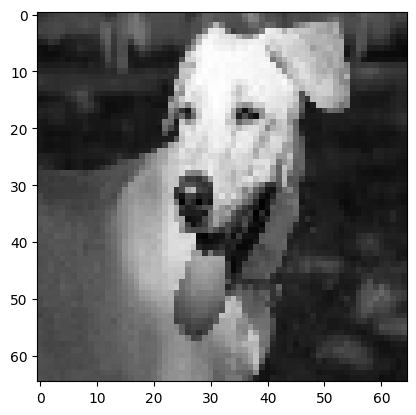

In [46]:
print('Prediction: ', y_pred_unseen[0])
mypet = x_test_unseen[0].reshape(65,65)
plt.imshow(mypet, cmap = 'gray')
plt.show

In [30]:
# Create a DataFrame with id and label columns and save in .csv
predictions_df = pd.DataFrame({'id': range(1, len(y_pred_unseen) + 1), 'label': y_pred_unseen})
predictions_df.to_csv('submission.csv', index=False)

In [19]:
print(predictions_df)

          id  label
0          1      1
1          2      0
2          3      1
3          4      0
4          5      0
...      ...    ...
12495  12496      1
12496  12497      0
12497  12498      0
12498  12499      1
12499  12500      1

[12500 rows x 2 columns]


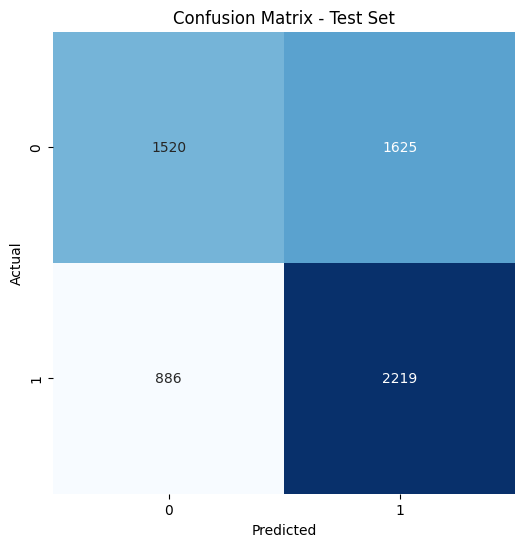

In [41]:
cm_val = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [39]:
# Visualize classification report for test set
report_val = classification_report(y_test, y_pred)
print("Classification Report - Validation Set:")
print(report_val)

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      3145
           1       0.58      0.71      0.64      3105

    accuracy                           0.60      6250
   macro avg       0.60      0.60      0.59      6250
weighted avg       0.60      0.60      0.59      6250



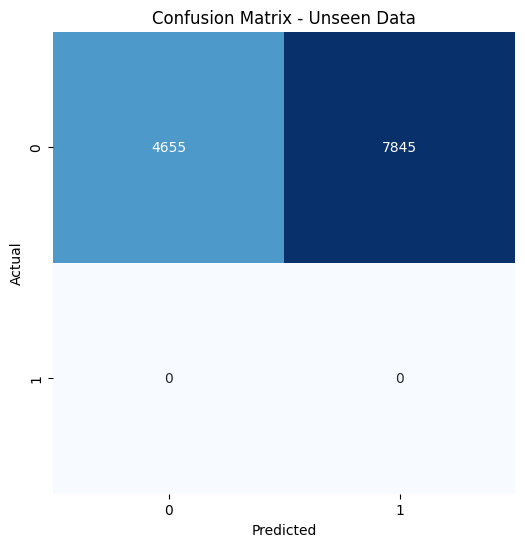

In [42]:
# Visualize confusion matrix for unseen set
cm_test = confusion_matrix(y_test_unseen, y_pred_unseen)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Unseen Data')
plt.show()

In [40]:
# Visualize classification report for unseen set
report_test = classification_report(y_test_unseen, y_pred_unseen)
print("Classification Report - Test Set:")
print(report_test)

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54     12500
           1       0.00      0.00      0.00         0

    accuracy                           0.37     12500
   macro avg       0.50      0.19      0.27     12500
weighted avg       1.00      0.37      0.54     12500



C:\Users\divya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
